In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Import mnist dataset from keras standard library
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.
/home/ding/anaconda3/envs/NN-GPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ding/anaconda3/envs/NN-GPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ding/anaconda3/envs/NN-GPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ding/anaconda3/envs/

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

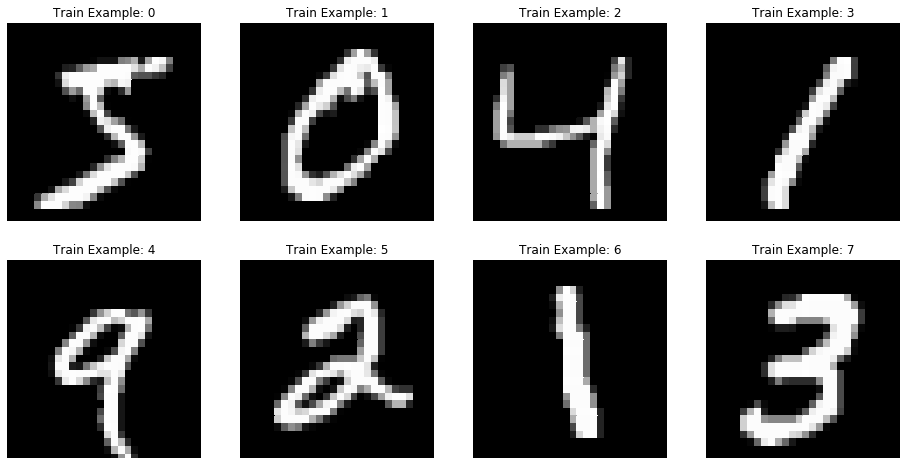

In [3]:
plt.figure(figsize=[16,8]);
for i in range(8):
    plt.subplot(2,4,i+1);
    sb.heatmap(X_train[i], cmap='gray', cbar=False)
    plt.title('Train Example: {}'.format(i))
    plt.axis('off')
    

In [4]:
X_train.shape, X_test.shape, type(X_train[0][0])

((60000, 28, 28), (10000, 28, 28), numpy.ndarray)

In [5]:
# Reshape 3D array to 2D and convert to float16 for memory efficiency
pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], pixels)).astype('float16')
X_test = X_test.reshape((X_test.shape[0], pixels)).astype('float16')

print(X_train.shape, X_test.shape)
print(X_train.min(), X_train.max())

(60000, 784) (10000, 784)
0.0 255.0


In [6]:
# Normalise X values from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
print(y_train)
# Create dummy variables for prediction categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_train

[5 0 4 ... 5 6 8]


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
y_train.shape
num_cats = y_train.shape[1]

In [9]:
def kerasNN(layer_structure, activation='sigmoid', opt='sgd', loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(layer_structure[1], input_dim=layer_structure[0], activation=activation))
    for l in layer_structure[2:]:
        model.add(Dense(l, activation=activation))
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model

model = kerasNN([X_train.shape[1], pixels, num_cats])
model.fit(X_train, y_train, epochs=10, batch_size=100)   
_, accuracy = model.evaluate(X_train, y_train)

print('{:.2f}%'.format(accuracy*100))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 2.0476 - acc: 0.4750
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.3396 - acc: 0.7648
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.9377 - acc: 0.8197
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.7429 - acc: 0.8409
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.6352 - acc: 0.8545
Epoch 6/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.5682 - acc: 0.8643
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.5224 - acc: 0.8711
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.4892 - acc: 0.8758
Epoch 9/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.4

In [10]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train = np.loadtxt('../data/train.csv', dtype=int, skiprows=1, max_rows=21000, delimiter=',')
test = np.loadtxt('../data/train.csv', dtype=int, skiprows=1, max_rows=7000, delimiter=',')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [14]:
df_test.shape[0] / (df_test.shape[0] + df_train.shape[0])

0.4

In [15]:
# Extract and normalise training data
X_train = df_train.iloc[:,1:].values/255
y_train = df_train.iloc[:,0].values
# Extract test data
X_test = df_test.iloc[:,1:].values/255
y_test = df_test.iloc[:,0].values

In [16]:
def y_binary(y, min_class=0):
    '''
    Converts numerical class values to binary vectors for multiclass problems.
    Returns m x k matrix where m is the number of examples and k is number of classes.
    >>> def y_binary([1,4,3])
    [[1,0,0,0],[0,0,0,1],[0,0,1,0]]
    '''
    # Class range starts at zero
    if not min_class:
        matrix = np.zeros((y.shape[0],y.max()+1))
        for i, j in enumerate(y):
            matrix[i][j] += 1
    # Class range starts at one
    else:
        matrix = np.zeros((y.shape[0],y.max()))
        for i, j in enumerate(y):
            matrix[i][j-1] += 1
        
    return np.array(matrix)

In [23]:
y_train = y_binary(y_train)
y_train

TypeError: 'numpy.float64' object cannot be interpreted as an integer